In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


category
sport       511
business    510
politics    417
tech        401
Name: count, dtype: int64


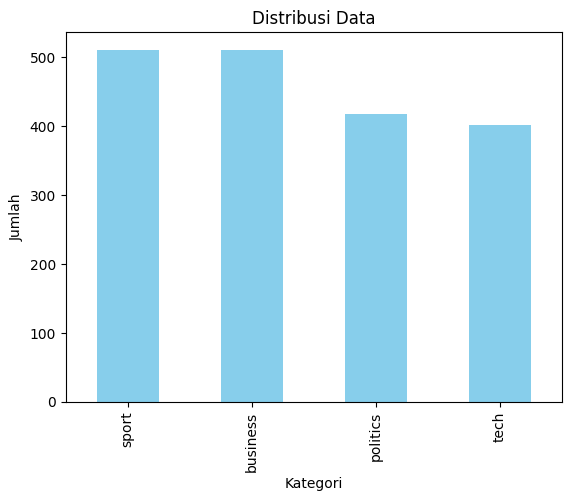

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memuat dataset (ganti dengan path dataset Anda)
df = pd.read_csv("/content/drive/MyDrive/NLP/bbc.csv")  # Asumsikan dataset memiliki kolom 'text' dan 'category'

# Distribusi data
print(df['category'].value_counts())
df['category'].value_counts().plot(kind='bar', color='skyblue', title="Distribusi Data")
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')  # Untuk tokenisasi

# Download punkt_tab data
nltk.download('punkt_tab') # This line is added to download the necessary data package

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Inisialisasi alat NLP
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Kamus slang ke formal
slang_dict = {
    "gonna": "going to",
    "wanna": "want to",
    "gotta": "got to",
    "ain't": "is not",
    "kinda": "kind of",
    "lemme": "let me",
    "gimme": "give me",
    "ya": "you",
    "bout": "about",
    "tho": "though",
    "cuz": "because",
    "coz": "because",
    "dunno": "do not know",
    "plz": "please",
    "gr8": "great",
    "rly": "really",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "idc": "I do not care",
    "idk": "I do not know",
}
    # Tambahkan kata slang lainnya di sini

def clean_text(text):
    text = text.lower()  # Ubah huruf kecil
    text = ''.join([char for char in text if char not in string.punctuation])  # Hapus tanda baca
    words = word_tokenize(text)  # Tokenisasi
    # Ganti kata slang
    words = [slang_dict[word] if word in slang_dict else word for word in words]
    # Stop words + stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words and word.isalpha()]
    return ' '.join(words)

# Terapkan pembersihan ke dataset
df['clean_text'] = df['text'].apply(clean_text)

# Tampilkan 20 hasil pertama
print(df[['text', 'clean_text']].head(20))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                 text  \
0   tv future in the hands of viewers with home th...   
1   worldcom boss  left books alone  former worldc...   
2   tigers wary of farrell  gamble  leicester say ...   
3   yeading face newcastle in fa cup premiership s...   
4   howard hits back at mongrel jibe michael howar...   
5   blair prepares to name poll date tony blair is...   
6   henman hopes ended in dubai third seed tim hen...   
7   wilkinson fit to face edinburgh england captai...   
8   virgin blue shares plummet 20% shares in austr...   
9   crude oil prices back above $50 cold weather a...   
10  hague  given up  his pm ambition former conser...   
11  moya emotional after davis cup win carlos moya...   
12  s korean credit card firm rescued south korea ...   
13  howard backs stem cell research michael howard...   
14  connors boost for british tennis former world ...   
15  japanese banking battle at an end japan s sumi...   
16  games maker fights for surv

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec

# Representasi TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Representasi Word2Vec
sentences = [text.split() for text in df['clean_text']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2)
word_vectors = word2vec_model.wv

# Contoh hasil
print("Contoh TF-IDF:", tfidf_matrix.toarray()[:1])
print("Contoh Word2Vec:", word_vectors['news'])  # Kata 'news' sebagai contoh


Contoh TF-IDF: [[0.         0.         0.         0.         0.02941048 0.
  0.         0.         0.         0.         0.         0.
  0.         0.02248554 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.0590348  0.         0.02827017 0.04889928
  0.03122739 0.         0.         0.         0.         0.
  0.         0.         0.03025987 0.03870366 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.03590076 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.07845684 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.03126973 0.03

In [ ]:
# --- Split data dan pelatihan model untuk TF-IDF ---
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_matrix, df['category'], test_size=0.2, random_state=42
)

# k-NN untuk TF-IDF
knn_model_tfidf = KNeighborsClassifier(n_neighbors=5)  # Define knn_model_tfidf here
knn_model_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Logistic Regression untuk TF-IDF
logreg_model_tfidf = LogisticRegression(max_iter=1000)  # Define logreg_model_tfidf here
logreg_model_tfidf.fit(X_train_tfidf, y_train_tfidf)

LogisticRegression(max_iter=1000)

In [ ]:
# --- Split data dan pelatihan model untuk Word2Vec ---
def document_vector(doc, model):
    words = [word for word in doc.split() if word in model.wv]
    if words:
        return np.mean(model.wv[words], axis=0)
    else:
        return np.zeros(model.vector_size)

X_word2vec = np.array(df['clean_text'].apply(lambda x: document_vector(x, word2vec_model)).tolist())
y = df['category']

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    X_word2vec, y, test_size=0.2, random_state=42
)

# k-NN untuk Word2Vec
knn_model_w2v = KNeighborsClassifier(n_neighbors=5)
knn_model_w2v.fit(X_train_w2v, y_train_w2v)

# Logistic Regression untuk Word2Vec
logreg_model_w2v = LogisticRegression(max_iter=1000)
logreg_model_w2v.fit(X_train_w2v, y_train_w2v)

LogisticRegression(max_iter=1000)

Evaluasi dengan TF-IDF
k-NN (TF-IDF):
[[91  5  0  5]
 [ 1 92  0  1]
 [ 1  0 97  0]
 [ 1  2  1 71]]
              precision    recall  f1-score   support

    business       0.97      0.90      0.93       101
    politics       0.93      0.98      0.95        94
       sport       0.99      0.99      0.99        98
        tech       0.92      0.95      0.93        75

    accuracy                           0.95       368
   macro avg       0.95      0.95      0.95       368
weighted avg       0.95      0.95      0.95       368

Akurasi (k-NN, TF-IDF): 0.9538043478260869


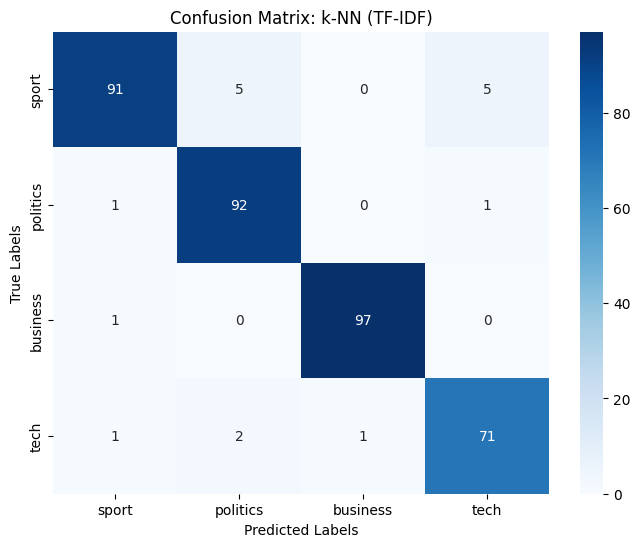

Logistic Regression (TF-IDF):
[[95  1  0  5]
 [ 1 93  0  0]
 [ 0  0 98  0]
 [ 1  0  2 72]]
              precision    recall  f1-score   support

    business       0.98      0.94      0.96       101
    politics       0.99      0.99      0.99        94
       sport       0.98      1.00      0.99        98
        tech       0.94      0.96      0.95        75

    accuracy                           0.97       368
   macro avg       0.97      0.97      0.97       368
weighted avg       0.97      0.97      0.97       368

Akurasi (LogReg, TF-IDF): 0.9728260869565217


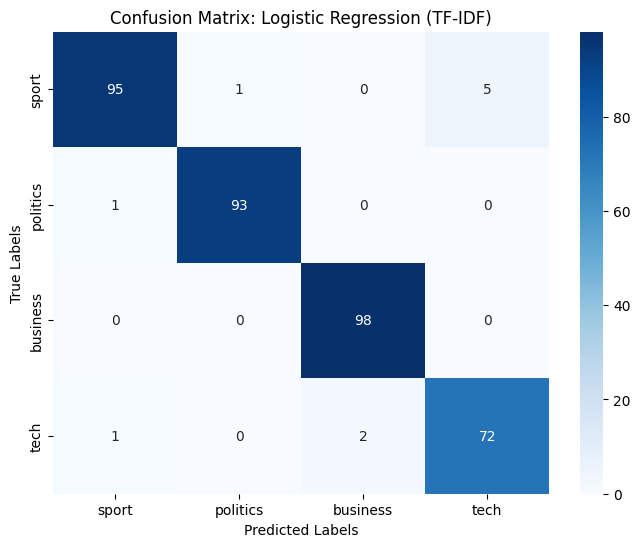

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_confusion_matrix(y_true, y_pred, title):
    """Fungsi untuk memplot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_true), yticklabels=set(y_true))
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Evaluasi Model untuk TF-IDF
print("Evaluasi dengan TF-IDF")
y_pred_knn_tfidf = knn_model_tfidf.predict(X_test_tfidf)
print("k-NN (TF-IDF):")
print(confusion_matrix(y_test_tfidf, y_pred_knn_tfidf))
print(classification_report(y_test_tfidf, y_pred_knn_tfidf))
print("Akurasi (k-NN, TF-IDF):", accuracy_score(y_test_tfidf, y_pred_knn_tfidf))
plot_confusion_matrix(y_test_tfidf, y_pred_knn_tfidf, "Confusion Matrix: k-NN (TF-IDF)")

y_pred_logreg_tfidf = logreg_model_tfidf.predict(X_test_tfidf)
print("Logistic Regression (TF-IDF):")
print(confusion_matrix(y_test_tfidf, y_pred_logreg_tfidf))
print(classification_report(y_test_tfidf, y_pred_logreg_tfidf))
print("Akurasi (LogReg, TF-IDF):", accuracy_score(y_test_tfidf, y_pred_logreg_tfidf))
plot_confusion_matrix(y_test_tfidf, y_pred_logreg_tfidf, "Confusion Matrix: Logistic Regression (TF-IDF)")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

def plot_confusion_matrix(y_true, y_pred, title):
    """Fungsi untuk memplot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_true), yticklabels=set(y_true))
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

print("\nEvaluasi dengan Word2Vec")
y_pred_knn_w2v = knn_model_w2v.predict(X_test_w2v)
print("k-NN (Word2Vec):")
print(confusion_matrix(y_test_w2v, y_pred_knn_w2v))
print(classification_report(y_test_w2v, y_pred_knn_w2v))
print("Akurasi (k-NN, Word2Vec):", accuracy_score(y_test_w2v, y_pred_knn_w2v))

y_pred_logreg_w2v = logreg_model_w2v.predict(X_test_w2v)
print("Logistic Regression (Word2Vec):")
print(confusion_matrix(y_test_w2v, y_pred_logreg_w2v))
print(classification_report(y_test_w2v, y_pred_logreg_w2v))
print("Akurasi (LogReg, Word2Vec):", accuracy_score(y_test_w2v, y_pred_logreg_w2v))


Evaluasi dengan Word2Vec
k-NN (Word2Vec):
[[96  2  0  3]
 [ 0 92  2  0]
 [ 0  0 98  0]
 [ 0  1  1 73]]
              precision    recall  f1-score   support

    business       1.00      0.95      0.97       101
    politics       0.97      0.98      0.97        94
       sport       0.97      1.00      0.98        98
        tech       0.96      0.97      0.97        75

    accuracy                           0.98       368
   macro avg       0.97      0.98      0.97       368
weighted avg       0.98      0.98      0.98       368

Akurasi (k-NN, Word2Vec): 0.9755434782608695
Logistic Regression (Word2Vec):
[[96  2  0  3]
 [ 2 91  1  0]
 [ 0  0 98  0]
 [ 1  3  1 70]]
              precision    recall  f1-score   support

    business       0.97      0.95      0.96       101
    politics       0.95      0.97      0.96        94
       sport       0.98      1.00      0.99        98
        tech       0.96      0.93      0.95        75

    accuracy                           0.96       3